In [29]:
import numpy as np
from numpy import sin, cos, pi
from scipy.fftpack import fft, fftfreq, ifft
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline


In [6]:
data=pd.read_csv('sunspot_data.csv')
data

,Unnamed: 0,Year,Month,Day,Date In Fraction Of Year,Number of Sunspots,Standard Deviation,Observations,Indicator
0,0,1818,1,1,1818.001,-1,-1.0,0,1
1,1,1818,1,2,1818.004,-1,-1.0,0,1
2,2,1818,1,3,1818.007,-1,-1.0,0,1
3,3,1818,1,4,1818.010,-1,-1.0,0,1
4,4,1818,1,5,1818.012,-1,-1.0,0,1
...,...,...,...,...,...,...,...,...,...
73713,73713,2019,10,27,2019.821,0,0.0,34,0
73714,73714,2019,10,28,2019.823,0,0.0,34,0
73715,73715,2019,10,29,2019.826,0,0.0,30,0
73716,73716,2019,10,30,2019.829,0,0.0,24,0


In [12]:
year=data['Date In Fraction Of Year']
sun_spot=data['Number of Sunspots']
clean=np.array(sun_spot)

Text(0.5, 1.0, 'uncleaned data of the number of sun spots')

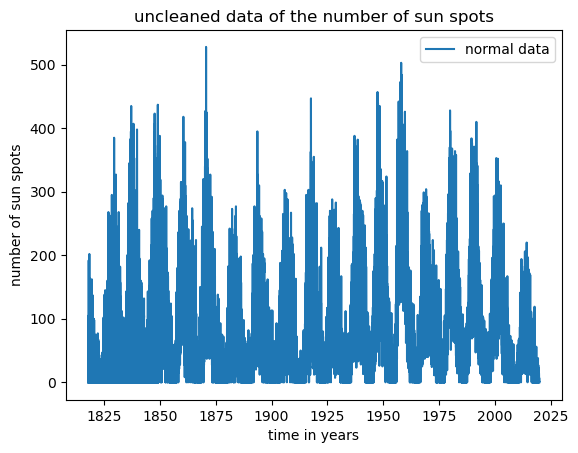

In [16]:
# plot the normal data first:

plt.plot(year,sun_spot,label='normal data')
plt.xlabel('time in years')
plt.ylabel('number of sun spots')
plt.legend()
plt.title('uncleaned data of the number of sun spots')

C:\Users\Abu El Bish\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


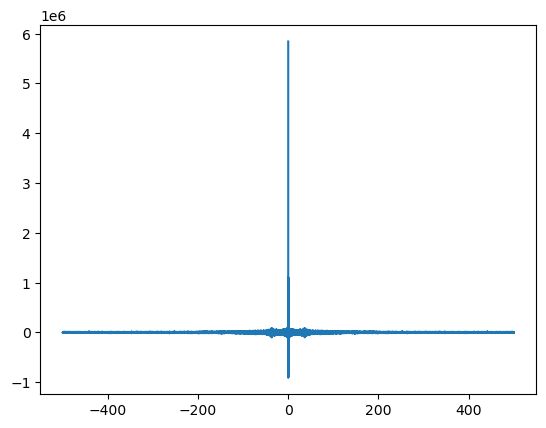

In [35]:
fs=1000
spectrum=fft(sun_spot)
F=fftfreq(len(year),1/fs)
positive=np.where(F>0)

plt.plot(F,spectrum)

In [36]:
import numpy as np
import scipy
from scipy import fftpack

In [58]:
sig_fft=fftpack.fft(sun_spot)

amplitude=np.abs(sig_fft)
power= amplitude**2
angle=np.angle(sig_fft)

sample_freq=fftpack.fftfreq(sun_spot.size, d=1)

amp_freq=np.array([amplitude,sample_freq])

amp_position=amp_freq[0,:].argmax()


high_freq_fft=sig_fft.copy()
high_freq_fft[np.abs(sample_freq)> peak_freq]=0 # if its higher than the peak frequence, assign it to zero

filtered_sig=fftpack.ifft(high_freq_fft)

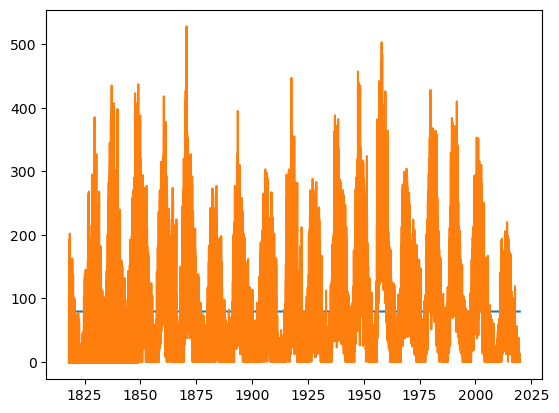

In [59]:
plt.plot(year,filtered_sig)
plt.plot(year,sun_spot)

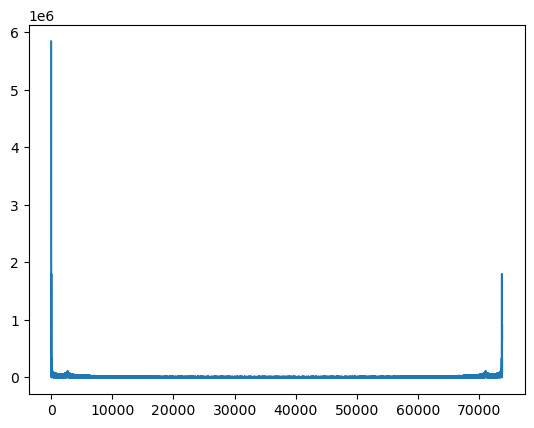

In [63]:
f=fft(sun_spot)

plt.plot(abs(f))

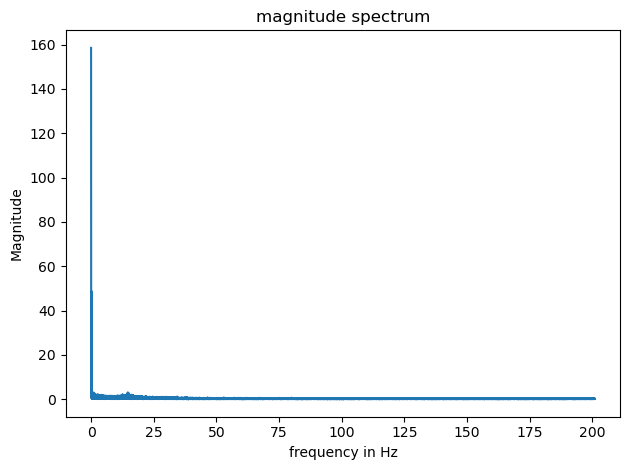

In [77]:
n=np.size(year)
Fs=(2019-1818)
fr=Fs*np.linspace(0,1,int(n/2))
x=fft(sun_spot)
x_magnitude=(2/n)*abs(x[0:np.size(fr)])
plt.plot(fr,x_magnitude)
plt.title('magnitude spectrum')
plt.xlabel('frequency in Hz')
plt.ylabel('Magnitude')
plt.tight_layout()


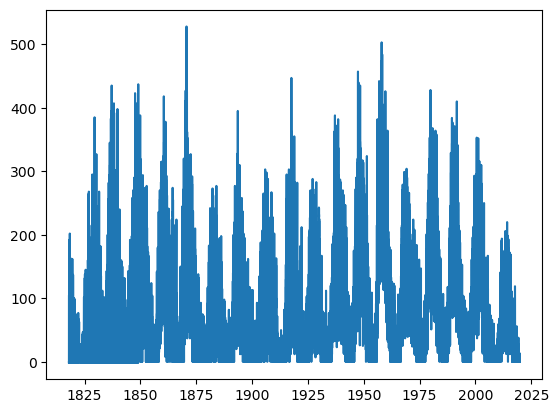

In [83]:
x[np.abs(x)< 0]=0
iff=fftpack.ifft(x)

plt.plot(year,iff)